# Insurance Fraud Capstone

Using the data found in this [URL](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection) 

The data license is CC0: Public Domain

## Loading and Overview

In [67]:
# importing libraries for data exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd
from geopandas import geodataframe
from sklearn.model_selection import train_test_split
from shapely.geometry import Point
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [48]:
# creating a dataframe from csv file and displaying first ten rows

df = pd.read_csv("fraud_insurance.csv")

df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [49]:
df.shape

(15420, 33)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [51]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


## Cleaning and Formatting

In [52]:
# Looking for missing values
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [53]:
# Looking for duplicate values

df.duplicated().sum()

0

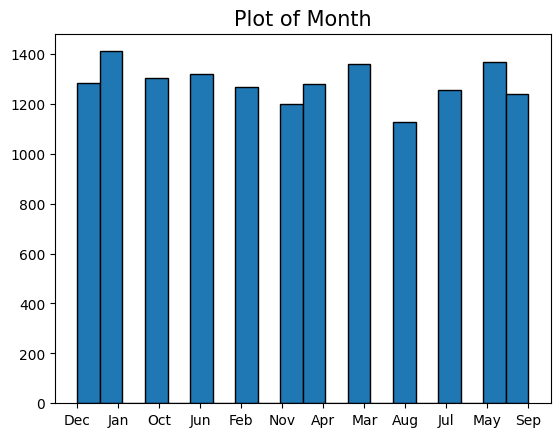

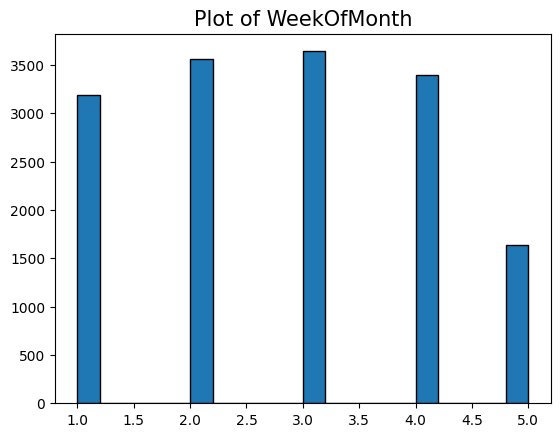

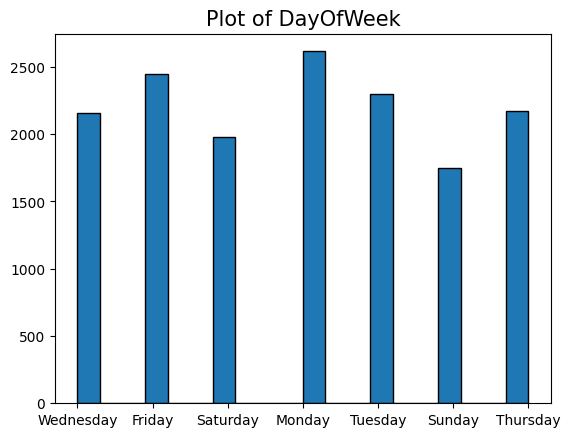

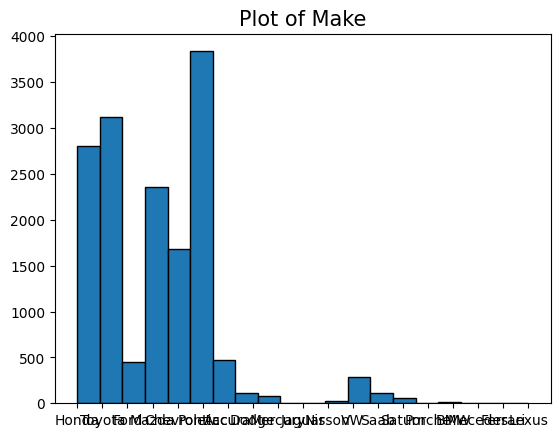

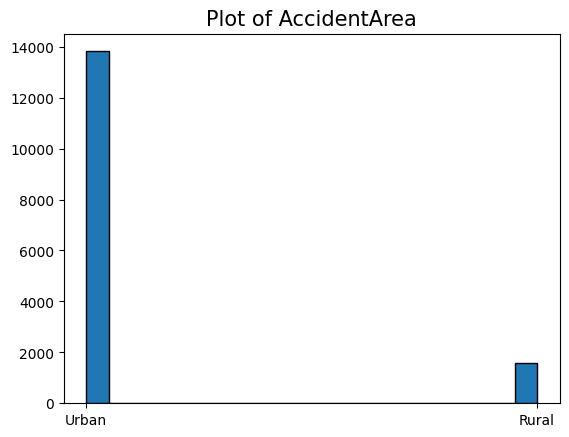

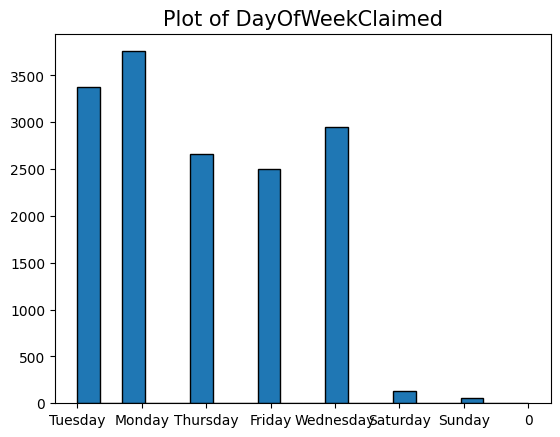

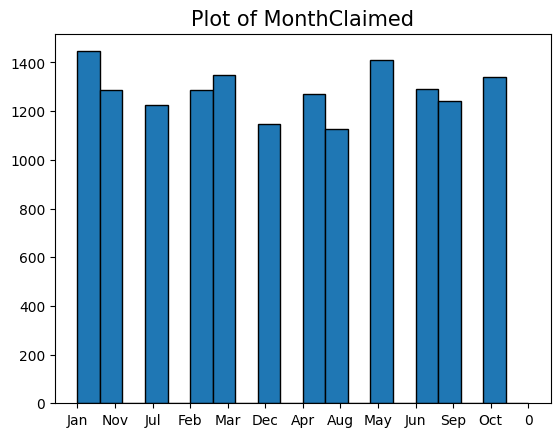

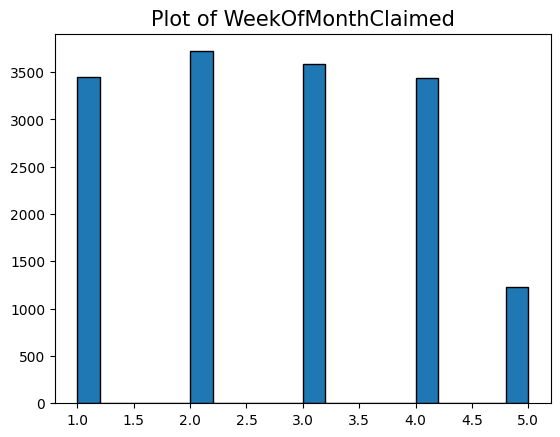

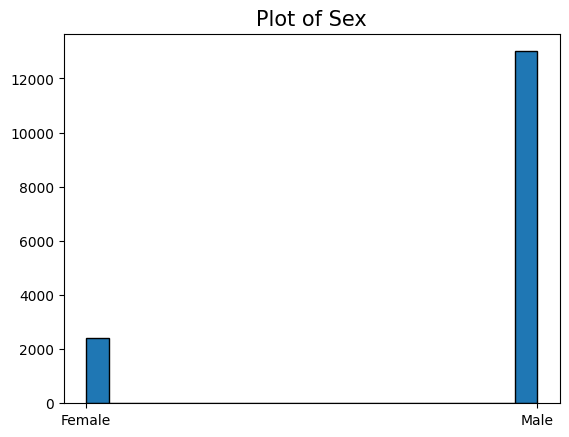

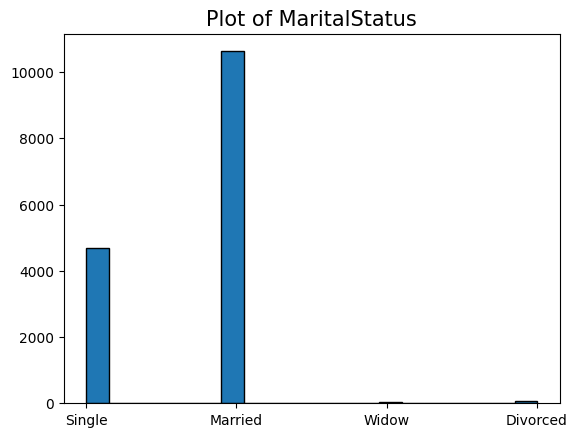

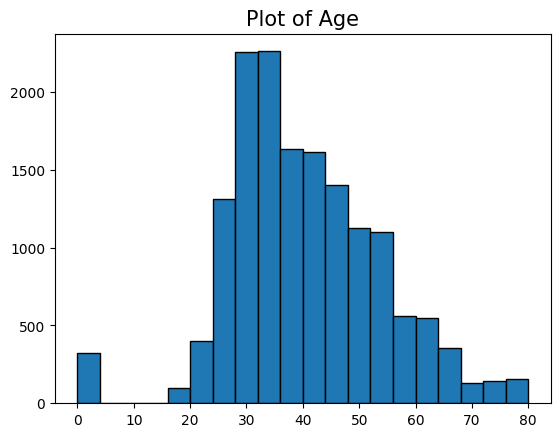

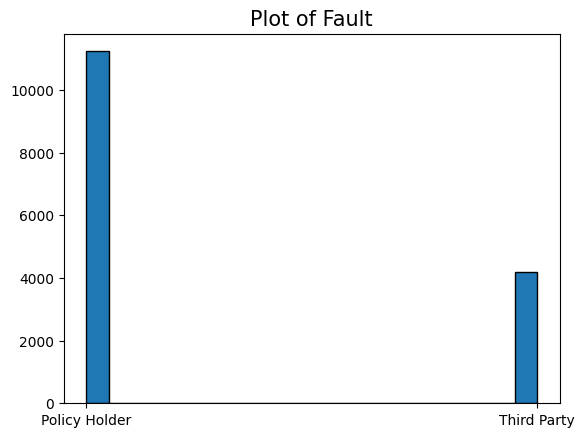

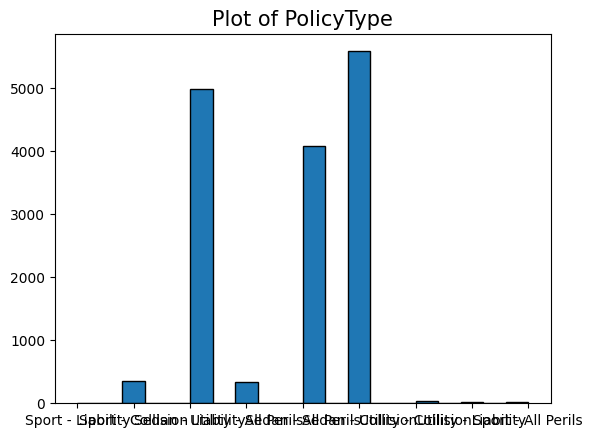

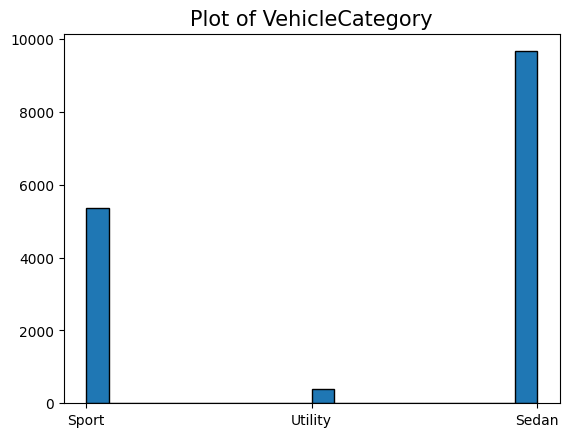

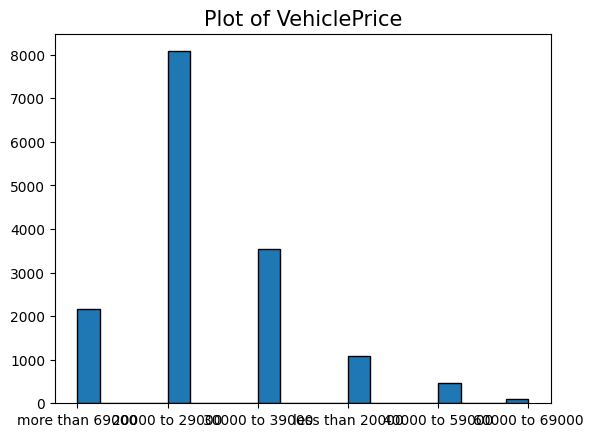

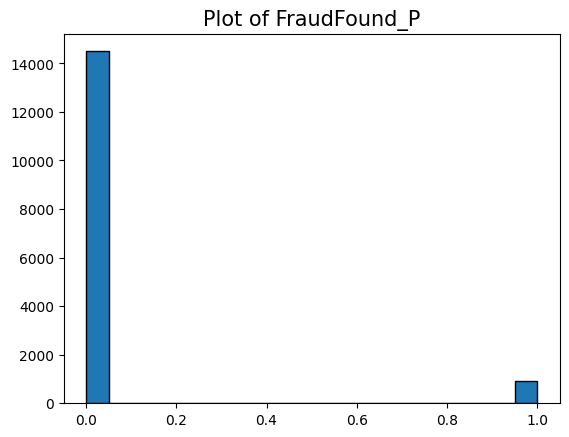

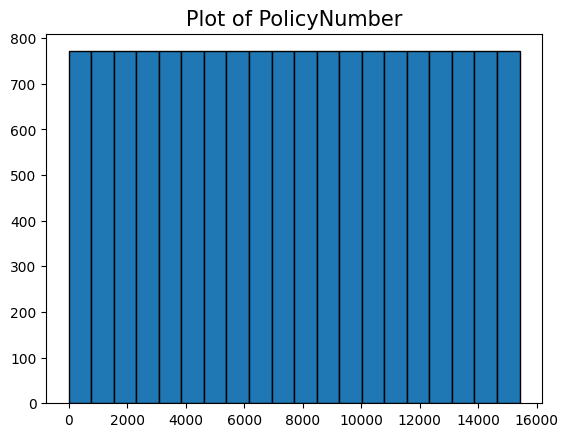

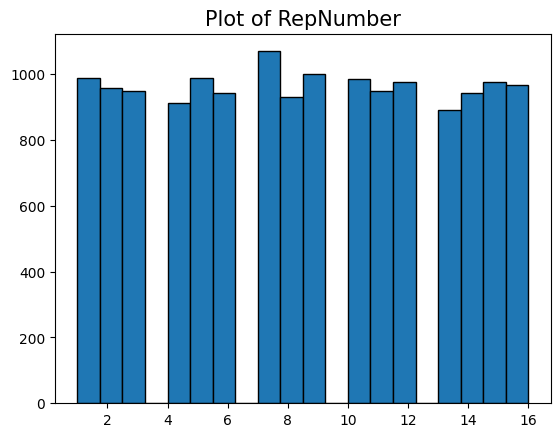

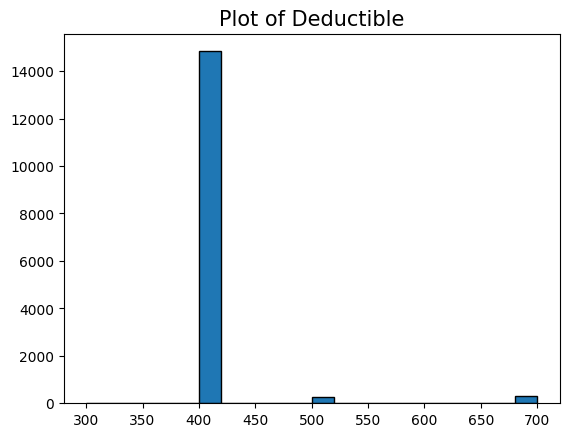

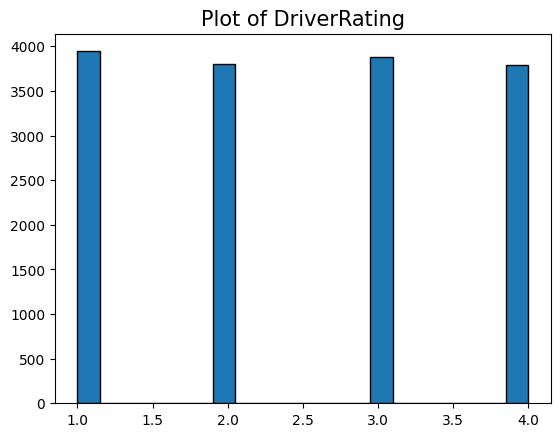

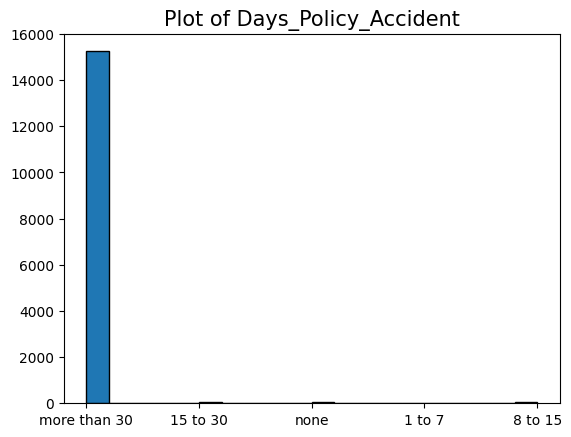

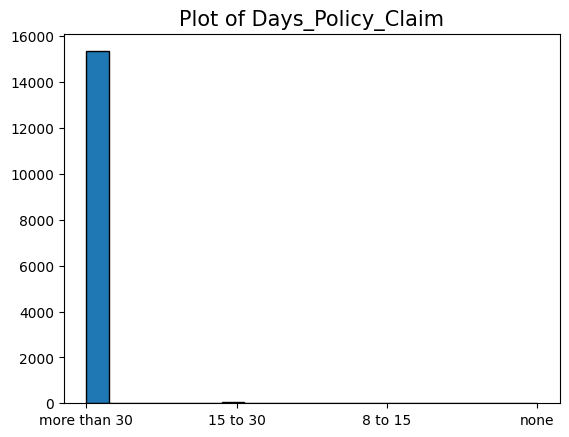

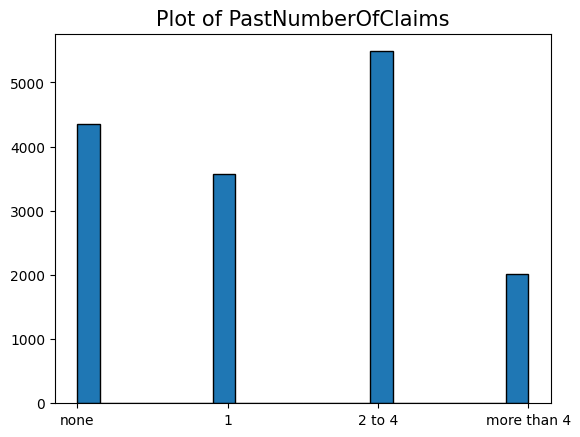

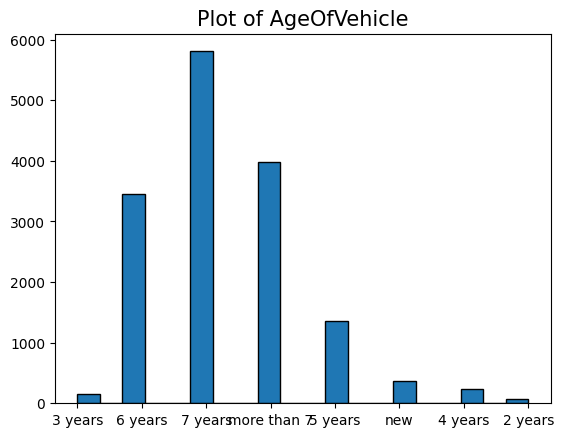

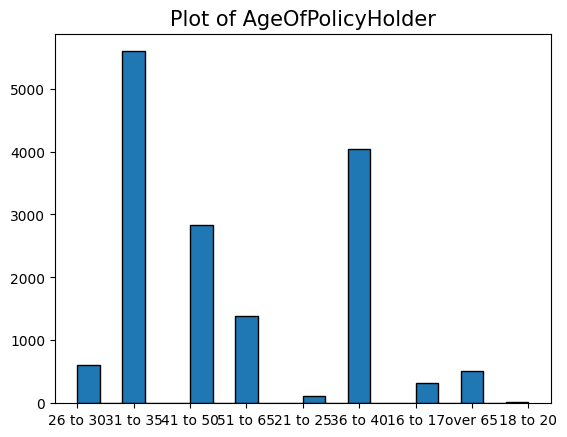

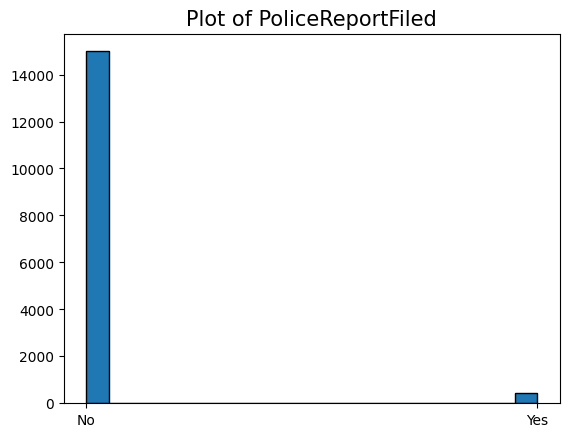

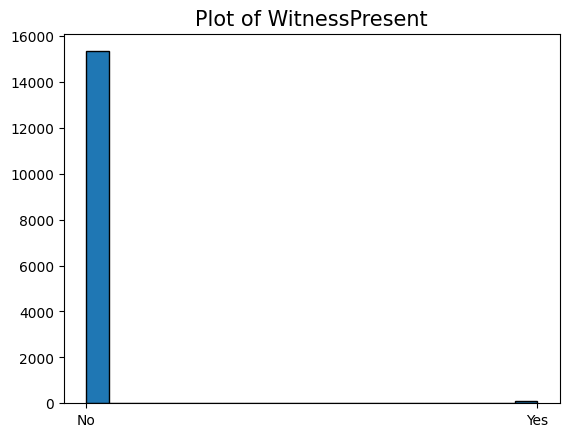

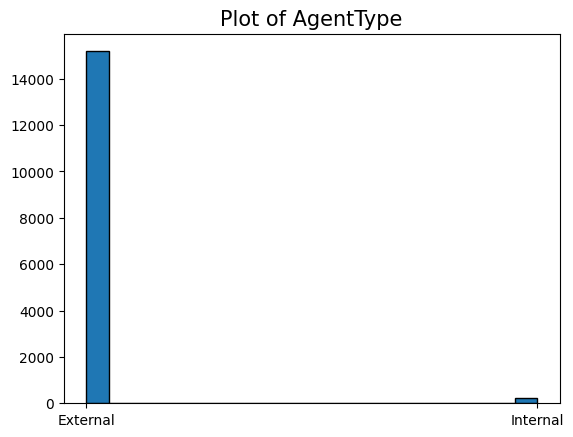

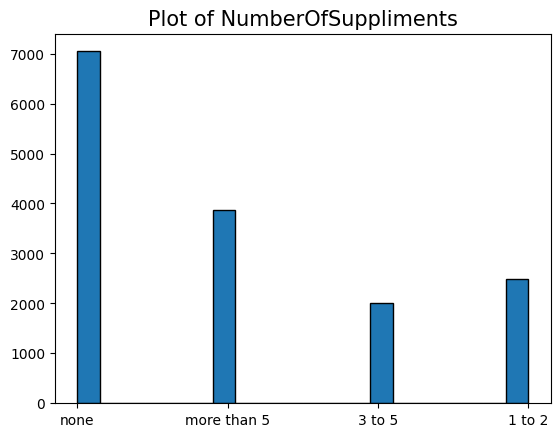

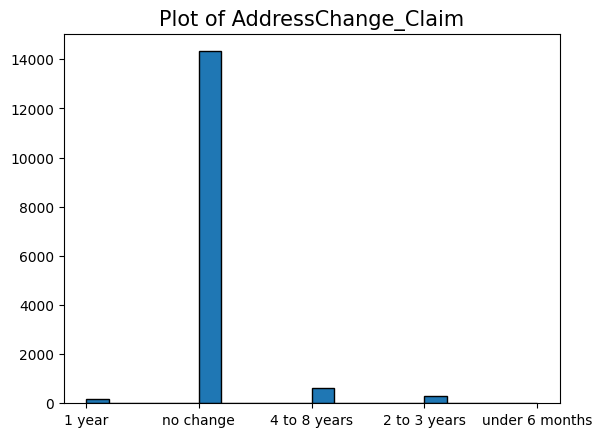

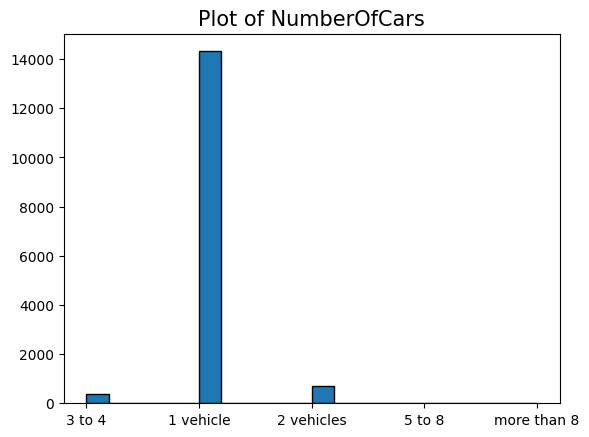

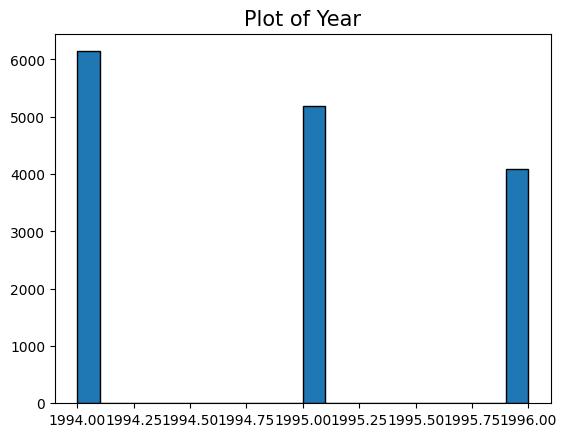

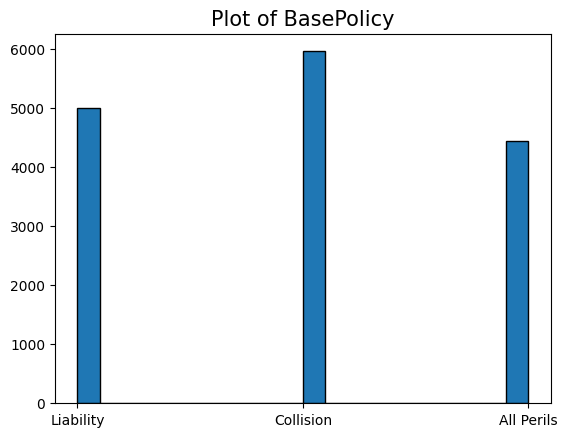

In [54]:
for feature in df.columns:
    plt.title("Plot of "+feature,fontsize=15)
    plt.hist(df[feature],bins=20, edgecolor='black')
    plt.show()

In [55]:
# creating a filter to isolate all of the fraud cases
fraud_fill = df['FraudFound_P'] == 1


In [56]:
# creating another dataframe that contains only the found fraud rows
df2 = df[fraud_fill]

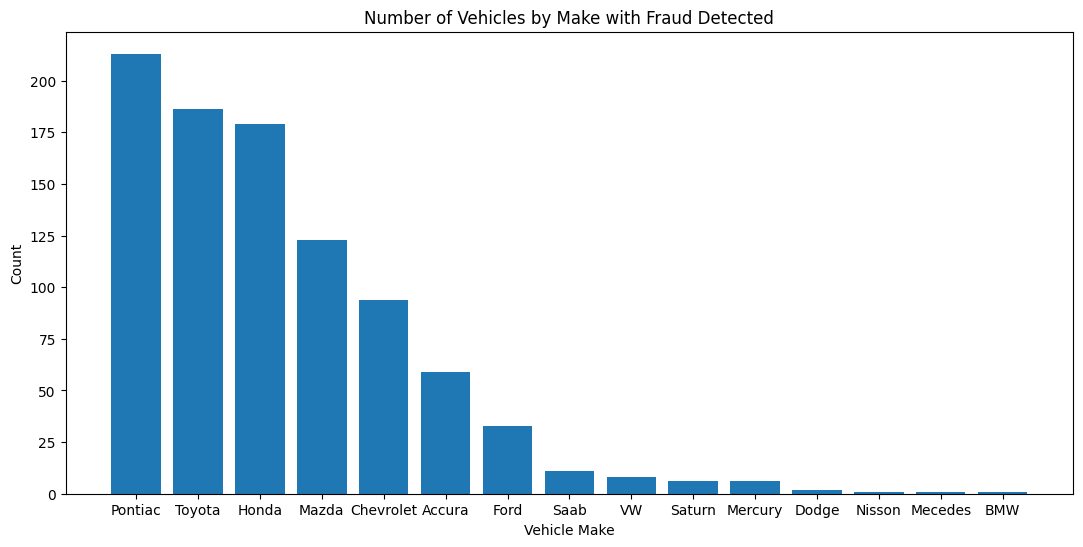

In [57]:
# Creating a plot of the count of different vehicle makes that fruad was detected on
vehicle_make = df2['Make'].value_counts()

plt.figure(figsize=(13,6))
plt.bar(vehicle_make.index, vehicle_make.values)
plt.xlabel('Vehicle Make')
plt.ylabel('Count')
plt.title('Number of Vehicles by Make with Fraud Detected')
plt.show()

<AxesSubplot:>

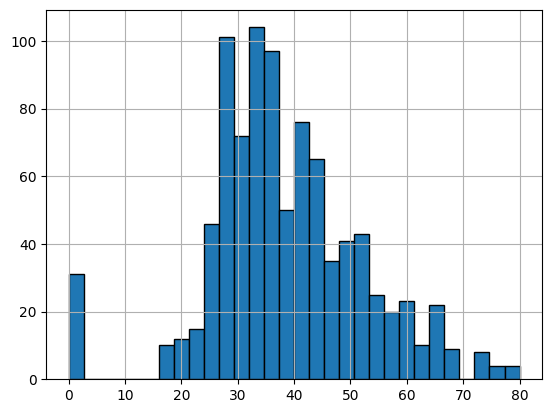

In [58]:
# histogram of applicant age in the fraud dataframe

df2['Age'].hist(bins=30, edgecolor='black')

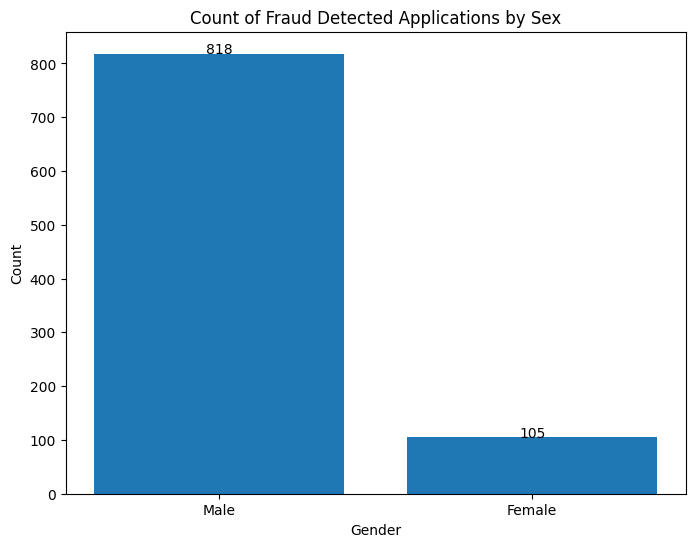

In [59]:
gender = df2['Sex'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(gender.index, gender.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Fraud Detected Applications by Sex')
for i, count in enumerate(gender.values):
    plt.text(i, count+0.5, str(count), ha='center', fontsize=10)

plt.show()

<AxesSubplot:>

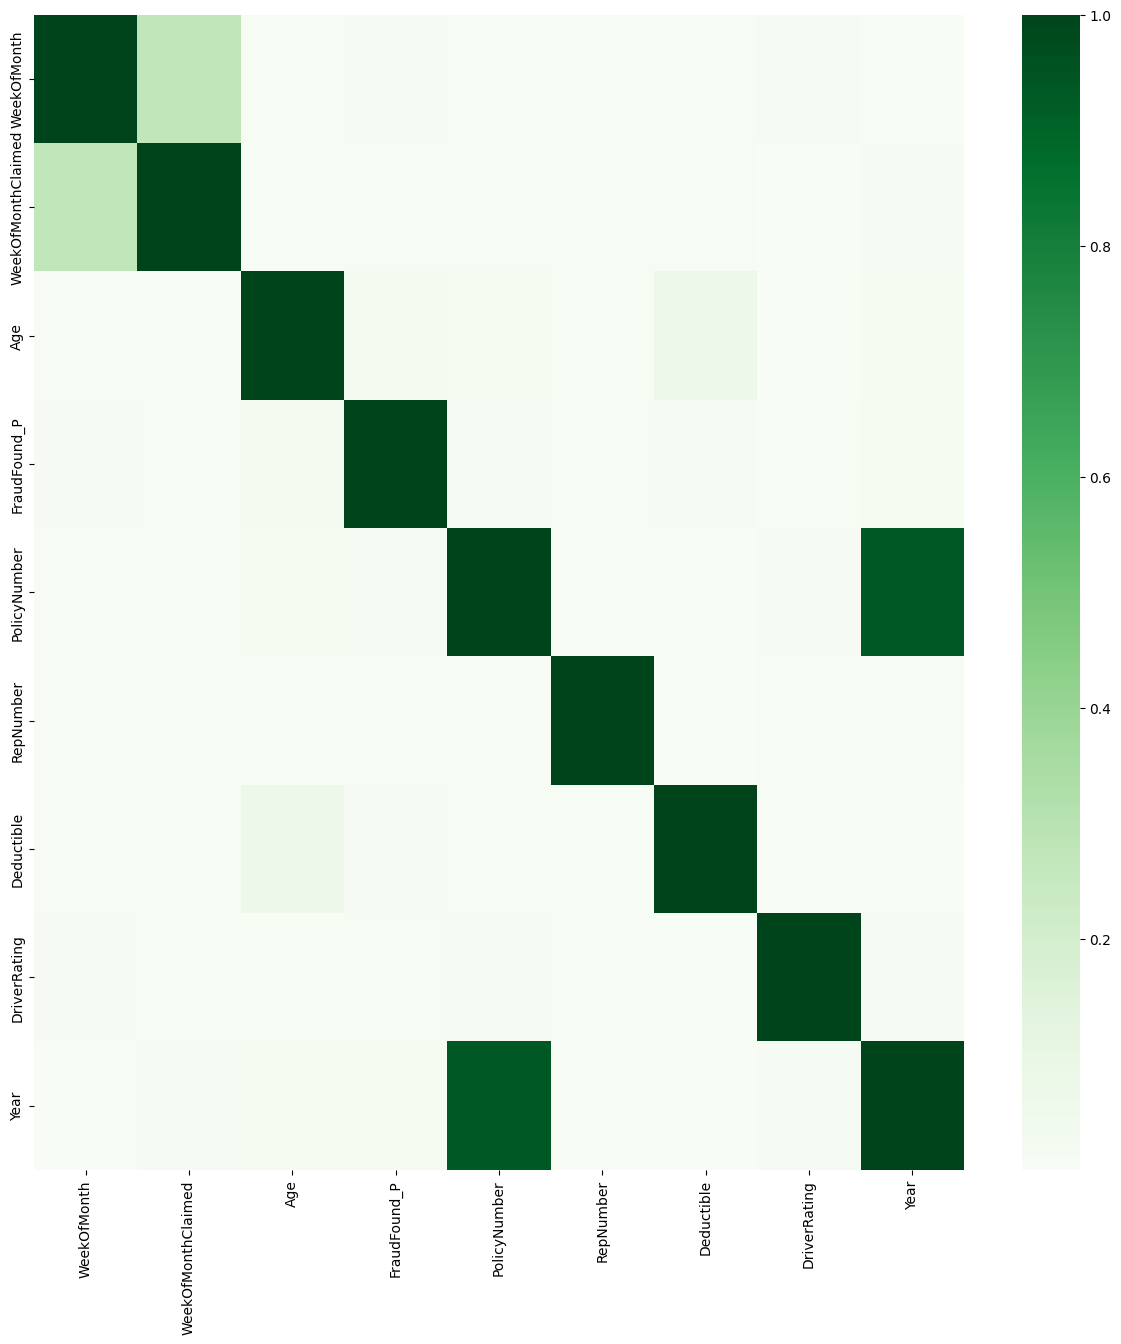

In [60]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=abs(df.corr()), cmap='Greens')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming your data is stored in X and y variables
class_weight_range = [{0: 1, 1: w} for w in range(1, 11)]  # Set the range of class weights to try

# Create a logistic regression model with class weighting
model = LogisticRegression()

# Define the grid search parameters
param_grid = {'class_weight': class_weight_range}

# Create a grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1')

# Fit the grid search object on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [66]:
y = df['FraudFound_P']
X = df.drop(columns=['FraudFound_P'])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1941,Jan,2,Monday,Mazda,Urban,Monday,Jan,2,Female,Married,...,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1994,Liability
9396,Nov,4,Wednesday,Mazda,Urban,Friday,Dec,4,Male,Married,...,more than 7,36 to 40,No,No,External,none,no change,1 vehicle,1995,Collision
1091,Nov,5,Monday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision
4772,Nov,1,Sunday,Mazda,Urban,Monday,Nov,1,Male,Single,...,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1994,Liability
73,Jan,1,Monday,Honda,Urban,Tuesday,Jan,1,Male,Married,...,more than 7,41 to 50,No,No,External,more than 5,no change,1 vehicle,1994,Collision


# END